# Gender Classification using income data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('income_evaluation.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df = df[['age', ' workclass',  ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', 
         ' hours-per-week', ' native-country',
        ' income']]

In [8]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [9]:
df = df.rename(columns = {
    ' workclass' : 'workclass',
    ' education' : 'education',
    ' marital-status' : 'maital-status',
    ' occupation' : 'occupation',
    ' relationship' : 'relationship',
    ' race' : 'race',
    ' sex' : 'sex',
    ' hours-per-week' :'hours-per-week', 
    ' native-country' : 'native-country',
        ' income' : 'income'  
})

In [10]:
df.head()

,age,workclass,education,maital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [11]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [12]:
df['sex'].values

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

### Seprate Male and Female Dataset

In [15]:
df_male = df[df['sex'] == ' Male']
df_male.head()

,age,workclass,education,maital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K


In [16]:
df_female = df[df['sex'] == ' Female']
df_female.head()

,age,workclass,education,maital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
12,23,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,30,United-States,<=50K


<AxesSubplot:>

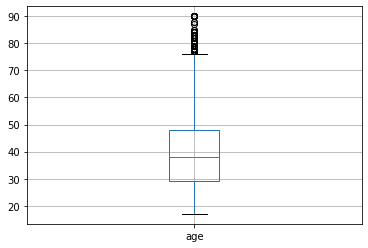

In [17]:
df_male.boxplot(column=['age'])

<AxesSubplot:>

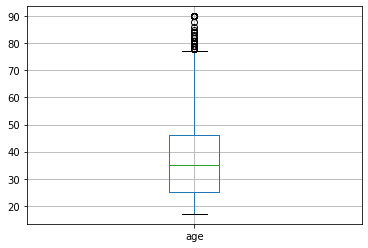

In [20]:
df_female.boxplot(column=['age'])

In [22]:
df_male['occupation'].value_counts()

 Craft-repair         3877
 Exec-managerial      2907
 Prof-specialty       2625
 Sales                2387
 Transport-moving     1507
 Other-service        1495
 Machine-op-inspct    1452
 Adm-clerical         1233
 Handlers-cleaners    1206
 ?                    1002
 Farming-fishing       929
 Tech-support          580
 Protective-serv       573
 Armed-Forces            9
 Priv-house-serv         8
Name: occupation, dtype: int64

In [23]:
df_male['relationship'].value_counts()

 Husband           13192
 Not-in-family      4430
 Own-child          2823
 Unmarried           792
 Other-relative      551
 Wife                  2
Name: relationship, dtype: int64

In [24]:
df_female['relationship'].value_counts()

 Not-in-family     3875
 Unmarried         2654
 Own-child         2245
 Wife              1566
 Other-relative     430
 Husband              1
Name: relationship, dtype: int64

In [26]:
df_female['occupation'].value_counts()

 Adm-clerical         2537
 Other-service        1800
 Prof-specialty       1515
 Sales                1263
 Exec-managerial      1159
 ?                     841
 Machine-op-inspct     550
 Tech-support          348
 Craft-repair          222
 Handlers-cleaners     164
 Priv-house-serv       141
 Transport-moving       90
 Protective-serv        76
 Farming-fishing        65
Name: occupation, dtype: int64

In [27]:
df_male['native-country'].value_counts()

 United-States                 19488
 Mexico                          497
 ?                               420
 Philippines                     125
 India                            89
 Canada                           82
 Germany                          77
 El-Salvador                      71
 Puerto-Rico                      62
 England                          58
 Cuba                             55
 China                            54
 Italy                            52
 South                            50
 Guatemala                        44
 Vietnam                          44
 Japan                            42
 Poland                           41
 Jamaica                          38
 Taiwan                           36
 Columbia                         35
 Dominican-Republic               35
 Iran                             35
 Portugal                         25
 Haiti                            24
 Greece                           24
 Nicaragua                        22
 

In [28]:
df_female['native-country'].value_counts()

 United-States                 9682
 ?                              163
 Mexico                         146
 Philippines                     73
 Germany                         60
 Puerto-Rico                     52
 Jamaica                         43
 Cuba                            40
 Canada                          39
 El-Salvador                     35
 Dominican-Republic              35
 England                         32
 South                           30
 Columbia                        24
 Vietnam                         23
 Italy                           21
 China                           21
 Japan                           20
 Haiti                           20
 Guatemala                       20
 Poland                          19
 Taiwan                          15
 Peru                            14
 Nicaragua                       12
 Portugal                        12
 France                          12
 India                           11
 Trinadad&Tobago            

<AxesSubplot:>

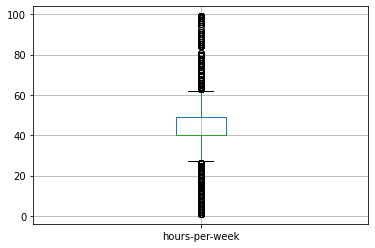

In [29]:
df_male.boxplot(column = ['hours-per-week'])

<AxesSubplot:>

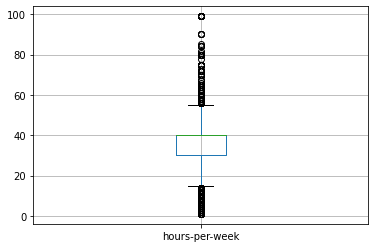

In [30]:
df_female.boxplot(column = ['hours-per-week'])

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['maital-status'] = le.fit_transform(df['maital-status'])
df['relationship'] = le.fit_transform(df['relationship'])
df['occupation'] = le.fit_transform(df['occupation'])
df['native-country'] = le.fit_transform(df['native-country'])
df['income'] = le.fit_transform(df['income'])
df['race'] = le.fit_transform(df['race'])

In [36]:
df.head()

,age,workclass,education,maital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,7,9,4,1,1,4,Male,40,39,0
1,50,6,9,2,4,0,4,Male,13,39,0
2,38,4,11,0,6,1,4,Male,40,39,0
3,53,4,1,2,6,0,2,Male,40,39,0
4,28,4,9,2,10,5,2,Female,40,5,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df[['age', 'workclass', 'education', 'maital-status', 'occupation',
       'relationship', 'hours-per-week', 'native-country',
       'income']].values
Y = df[['sex']].values

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 4) 

In [44]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((26048, 9), (6513, 9), (26048, 1), (6513, 1))

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## SVC

In [46]:
svc = SVC()

In [47]:
svc

SVC()

In [48]:
svc.fit(X_train,Y_train)

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [49]:
Y_pred_1 = svc.predict(X_test)

In [50]:
Y_pred_1[:5]

array([' Male', ' Male', ' Male', ' Female', ' Male'], dtype=object)

In [52]:
from sklearn.metrics import accuracy_score

In [54]:
print("Accuracy using SVM is: ",accuracy_score(Y_test, Y_pred_1))

Accuracy using SVM is:  0.7847382158759404


## Random Forest

In [55]:
rfc = RandomForestClassifier(n_estimators=100)

In [56]:
rfc

RandomForestClassifier()

In [57]:
rfc.fit(X_train, Y_train)

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [58]:
Y_pred_2 = rfc.predict(X_test)

In [59]:
Y_pred_2[:5]

array([' Male', ' Male', ' Male', ' Female', ' Male'], dtype=object)

In [60]:
print("Accuracy using Random forest is: ",accuracy_score(Y_test, Y_pred_2))

Accuracy using Random forest is:  0.8254260709350529
